# Modified DLA

The code below implements a modified version of the classical diffusion limited aggregation algorithm. The algorithm is as follows: 

Input: $N$, $T$, `num_particles`


1. Initialize an $N \times N$ matrix of 0s. 
2. Initialize an initial set (cluster) of seed points. Note that the cluster's shape matters. The code below implemented first a diamond/square-shaped cluster and then a circle-shaped cluster. Points in the cluster are coordinate pairs that also coorespond to entries in the $N \times N$ matrix. Points in the cluster are represented in the matrix with 1s.
3. Release a number of particles determined by `num_particles` uniformly at random within the $N \times N$ box.
4. Step all of of these particles in random directions. Note that particles are prohibited from walking "out of bounds" (they reflect off the grid's boundary)
5. If a particle moves into a spot adjacent (diagonal adjacency doesn't count) to a particle in the cluster, this particle is added to the cluster and no longer takes random steps. 
6. Steps 4 and 5 are repeated until a time counter reaches a value of $T$, at which point the simulation ends and the matrix of 0s and 1s is printed, with 1s colored black and 0s colored white. 

In [1]:
# packages used
import math
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors
import random
%matplotlib inline


In [2]:
def taxicab_distance(pos_one, pos_two): # used to generate diamond-shaped seed cluster
    return abs(pos_one[0]-pos_two[0]) + abs(pos_one[1]-pos_two[1])

In [5]:
def check_atEdge(pos, N):
    atEdge = False
    if pos[0] >= N-1 or pos[0] <= 1 or pos[1] >= N-1 or pos[1] <= 1:
        atEdge = True
    return atEdge

In [6]:
def check_stuck(pos, N, matrix):

    stuck = False
    atEdge = check_atEdge(pos, N)
    if not atEdge:                       
        posDown = matrix[pos[1]+1, pos[0]]  
        posUp = matrix[pos[1]-1, pos[0]]
        posRight = matrix[pos[1], pos[0]+1]
        posLeft = matrix[pos[1], pos[0]-1]
        if posDown == 1 or posUp == 1 or posRight == 1 or posLeft == 1:
            stuck = True
            
    return stuck

In [7]:
def random_in_box(N):
    x = int(random.uniform(0,N))
    y = int(random.uniform(0,N))
    return x,y

`step_all_walkers`: updates every walker in the `walkers` list by stepping each walker in a random direction. Note that the function currently does not resolve situations where walkers step into the same position. The resolutions I came up with were not computationally feasible and slowed the program down too much. 

In [11]:
def step_all_walkers(walkers): 
    initial_positions = walkers
    updated_positions = []
    
    for walker in walkers: 
        decision = random.randint(0,3)
        
        if decision == 0: 
            updated_walker = (min(walker[0]+1, N), walker[1])
        elif decision == 1: 
            updated_walker = (max(walker[0]-1, 0), walker[1])
        elif decision == 2: 
            updated_walker = (walker[0], min(walker[1] + 1, N))
        elif decision == 3: 
            updated_walker = (walker[0], max(walker[1]-1, 0))
        
        updated_positions.append(updated_walker)
            
    return updated_positions 

1 timesteps so far, particles added to cluster:  0
3 timesteps so far, particles added to cluster:  5411
5 timesteps so far, particles added to cluster:  10390
7 timesteps so far, particles added to cluster:  16616
9 timesteps so far, particles added to cluster:  24547


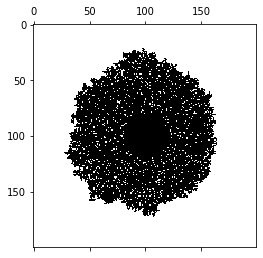

In [28]:
N = 200 # grid size
num_particles = 100000

walkers = []
cluster = []

matrix = np.zeros((N,N))
cmap = colors.ListedColormap(['white', 'black'])

cluster = [(col, row) for row in range(0,N) for col in range(0,N) 
           if (col-N//2)**2 + (row-N//2)**2 < (20)**2] # circular seed 
           
           #if taxicab_distance((col,row), (N//2, N//2)) < 50] # diamond/square seed

for particle in cluster: # update the grid to reflect this cluster choice
    matrix[particle[1]][particle[0]] = 1

# for row in range(0, N): # this makes the seed cluster a box 
#     for col in range(0, N):
#         if taxicab_distance((col,row), (N//2, N//2)) < 20:
#             matrix[row][col] = 1
#             cluster.append((col,row))

T = 10
particlesAdded = 0
t = 0
    
for i in range (0, num_particles):  # this loop initializes walker positions uniformly at random in the grid
    walker = random_in_box(N)
    walkers.append(walker)

while t < T and particlesAdded < num_particles: # run simulation up to T time-steps
    t += 1
    walkers = step_all_walkers(walkers)
    
    interval = range(1, T, 2)
    if t in interval:
        print(t, "timesteps so far, particles added to cluster: ", particlesAdded)
    
    for walker in walkers:
        
        walker_stuck = check_stuck(walker, N, matrix)
        
        if walker_stuck: 
            matrix[walker[1]][walker[0]] = 1
            particlesAdded += 1
            walkers.remove(walker)
            cluster.append(walker)
            
plt.matshow(matrix, interpolation = 'nearest', cmap = cmap)
plt.show()